In [202]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [203]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [204]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func
#from sqlalchemy.sql.functions import concat
#from sqlalchemy.dialects.postgresql import INTERVAL
import datetime

In [205]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [206]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [207]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [208]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [210]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [211]:
# Find the most recent date in the data set.
last_day = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_day

('2017-08-23',)

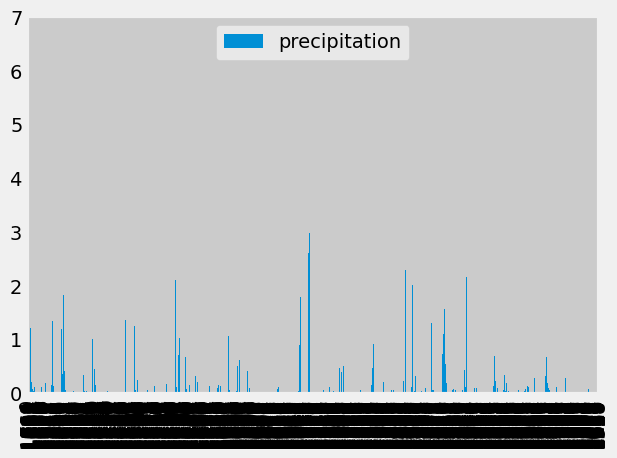

In [201]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
day_last_year = datetime.datetime.strptime(str(last_day[0]), '%Y-%m-%d') - datetime.timedelta(days=365)
day_last_year_str = day_last_year.strftime('%Y-%m-%d')
day_last_year_str
# Perform a query to retrieve the data and precipitation scores
sel_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= day_last_year_str).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(sel_data, columns=['date', 'precipitation'])
#df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date
sorted_df = df.sort_values(by=['date'], ascending=True)
#sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
#sorted_df.set_index('date', inplace=True)

sorted_df.plot.bar()
plt.tight_layout()
plt.show()

In [212]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [213]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.id)).all()
station_count

[(9,)]

In [214]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station).label('frequency'))\
.group_by(measurement.station)\
.order_by(func.count(measurement.station).desc())\
.all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [225]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel_data = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
.filter(measurement.station == station.station)\
.filter(measurement.station == station_count[0]['station'])\
.all()

sel_data[0]
alld = session.query(measurement.date, measurement.prcp, measurement.tobs).filter(measurement.date >= '2016-09-09').all()

#.filter(measurement.station == station.station)\
#.filter(measurement.date >= '2017-09-09')\
#.all()
alld

[('2016-09-09', 0.03, 79.0),
 ('2016-09-10', 0.0, 78.0),
 ('2016-09-11', 0.05, 76.0),
 ('2016-09-12', 0.0, 78.0),
 ('2016-09-13', 0.02, 78.0),
 ('2016-09-14', 1.32, 75.0),
 ('2016-09-15', 0.42, 79.0),
 ('2016-09-16', 0.06, 80.0),
 ('2016-09-17', 0.05, 79.0),
 ('2016-09-18', 0.0, 81.0),
 ('2016-09-19', 0.0, 77.0),
 ('2016-09-20', 0.0, 77.0),
 ('2016-09-21', 0.0, 78.0),
 ('2016-09-22', 0.02, 76.0),
 ('2016-09-23', 0.0, 82.0),
 ('2016-09-24', 0.0, 81.0),
 ('2016-09-25', 0.0, 78.0),
 ('2016-09-26', 0.06, 80.0),
 ('2016-09-27', 0.02, 80.0),
 ('2016-09-28', 0.0, 79.0),
 ('2016-09-29', 0.0, 80.0),
 ('2016-09-30', 0.0, 80.0),
 ('2016-10-01', 0.0, 80.0),
 ('2016-10-02', 0.0, 79.0),
 ('2016-10-03', 0.0, 79.0),
 ('2016-10-04', 0.0, 79.0),
 ('2016-10-05', 0.0, 80.0),
 ('2016-10-06', 0.0, 80.0),
 ('2016-10-07', 0.0, 79.0),
 ('2016-10-08', 0.0, 78.0),
 ('2016-10-09', 0.0, 76.0),
 ('2016-10-10', 0.0, 75.0),
 ('2016-10-11', 0.0, 80.0),
 ('2016-10-12', 0.0, 80.0),
 ('2016-10-13', 0.0, 79.0),
 ('2016-10

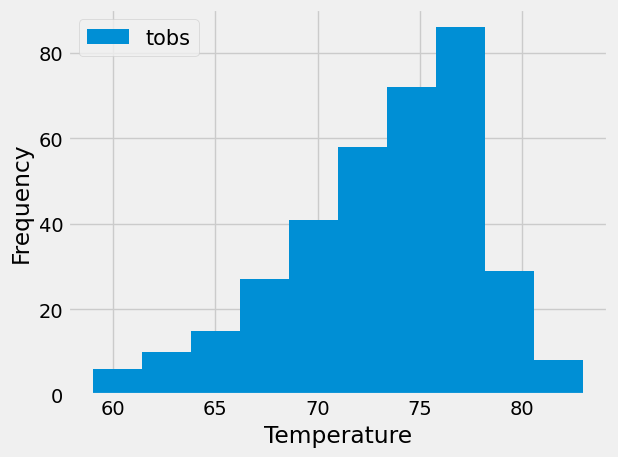

In [181]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel_data = session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs)\
.filter(measurement.date >= day_last_year_str)\
.filter(measurement.station == station_count[0]['station'])\
.all()

#sel_data

df = pd.DataFrame(sel_data, columns=['station', 'date', 'precipitation', 'temperature'])
df['date'] = pd.to_datetime(df['date'])
df.head

temps = df['temperature']

temps.plot.hist(label = 'tobs')
plt.xlabel('Temperature')
plt.legend(prop ={'size': 15})
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()